In [1]:
import pandas as pd
from matplotlib import pyplot

In [2]:
df = pd.read_csv('Iris2.csv')

In [3]:
# First 5 rows of dataset
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,NaN,3.2,1.3,0.2,Iris-setosa
3,4,4.6,NaN,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Missing values in each attribute
df.apply(lambda x: sum(x.isnull()))

Id               0
SepalLengthCm    7
SepalWidthCm     5
PetalLengthCm    6
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
#Original Datafram dimensions with missing values
df.shape

(150, 6)

In [5]:
# Dropping the rows with missing values
df.dropna()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
# filling the missing values with most frequesnt value of the attribute
df['SepalLengthCm'].fillna(df['SepalLengthCm'].mode()[0], inplace=True)
df['SepalWidthCm'].fillna(df['SepalWidthCm'].mode()[0], inplace=True)
df['PetalLengthCm'].fillna(df['PetalLengthCm'].mode()[0], inplace=True)
df.apply(lambda x: sum(x.isnull()))

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:xlabel='Id', ylabel='SepalWidthCm'>

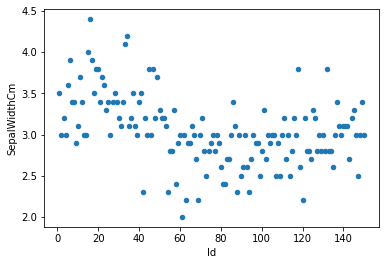

In [10]:
# understand the range of values of sepal width to consider for binning
df.plot('Id','SepalWidthCm',kind='scatter')

In [11]:
# Binning Function
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

In [12]:
#Binning sepal width:
cut_points = [2.5,3.5]
labels = ["short","medium", "Large"]
df["SepalWidth"] = binning(df["SepalWidthCm"], cut_points, labels)
pd.value_counts(df["SepalWidth"])

medium    115
short      18
Large      17
Name: SepalWidth, dtype: int64

In [13]:
#Data Normalization
from sklearn.preprocessing import MinMaxScaler 
# separate array into input and output components
array = df.values
X = array[:,1:5] 
Y = array[:,5]  
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X) 
print(rescaledX[1:5,:])

[[0.16666667 0.41666667 0.06779661 0.04166667]
 [0.19444444 0.5        0.05084746 0.04166667]
 [0.08333333 0.41666667 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]
